In [3]:
pip install scanpy

     |████████████████████████████████| 2.0 MB 5.2 MB/s 
     |████████████████████████████████| 11.2 MB 40.6 MB/s 
     |████████████████████████████████| 88 kB 6.5 MB/s 
     |████████████████████████████████| 96 kB 4.6 MB/s 
     |████████████████████████████████| 930 kB 50.6 MB/s 
     |████████████████████████████████| 1.1 MB 45.7 MB/s 
     |████████████████████████████████| 63 kB 2.0 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=7277bbd6bd6e49f054e8ffd9e82d41746900ebbaad612eca90673dffab851db6
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.7-py3-none-any.whl size=54286 sha256=b5b41a2da6ad957f63268321bd244f41e6d1b9f18523d61cfd0daad18dd7e660
  Stored in directory: /root/.cache/pip/wheels/7f/2a/f8/7bd5dcec71bd5c669f6f574db3113513696b98f3f9b51f496c
  Created wheel for session-info: filename=session_info-1.0.0-py3-no

In [2]:
import numpy as np
import pandas as pd
import scanpy as sc

In [5]:
from google.colab import files
uploaded = files.upload()

Saving lowdim_rna_prot_separated.csv to lowdim_rna_prot_separated.csv


In [ ]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.21.6 scipy==1.4.1 pandas==1.3.5 scikit-learn==1.0.2 statsmodels==0.10.2 pynndescent==0.5.6


In [ ]:
results_file = 'write/pbmc3k.h5ad'  # the file that will store the analysis results

In [3]:
adata = sc.read_csv('lowdim_rna_prot_separated.csv')

In [4]:
adata.X.shape

(7895, 64)

In [5]:
sc.pp.normalize_total(adata, target_sum=1e4)

In [6]:
sc.pp.log1p(adata)

/home/jupyter/anaconda3/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:352: RuntimeWarning: invalid value encountered in log1p
  np.log1p(X, out=X)


In [7]:
adata.X=np.nan_to_num(adata.X)

In [8]:
adata.X

array([[6.180141 , 0.       , 5.846397 , ..., 0.       , 0.       ,
        6.131546 ],
       [6.496804 , 0.       , 5.7483187, ..., 0.       , 5.267929 ,
        4.604205 ],
       [5.708498 , 0.       , 6.062463 , ..., 0.       , 0.       ,
        5.2579784],
       ...,
       [5.0692296, 0.       , 5.700587 , ..., 0.       , 0.       ,
        5.379109 ],
       [5.522518 , 0.       , 5.76582  , ..., 0.       , 0.       ,
        5.78808  ],
       [5.2555504, 0.       , 5.8311224, ..., 0.       , 0.       ,
        5.1532288]], dtype=float32)

In [9]:
adata

AnnData object with n_obs × n_vars = 7895 × 64
    uns: 'log1p'

In [10]:
#adata = adata[:, adata.var.highly_variable]
sc.tl.pca(adata,svd_solver='arpack')

/home/jupyter/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps,
/home/jupyter/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/least_angle.py:597: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps, copy_X=

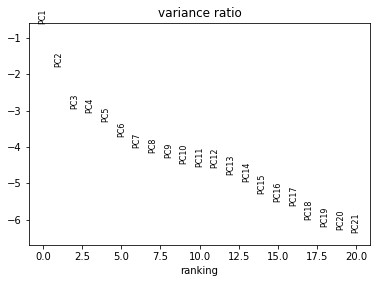

In [11]:
sc.pl.pca_variance_ratio(adata,n_pcs=20,log=True)


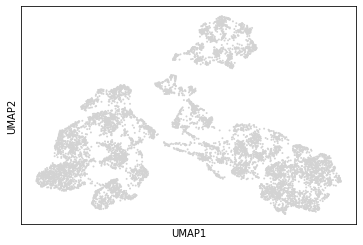

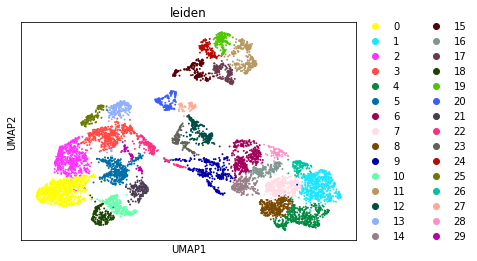

In [12]:
sc.pp.neighbors(adata, n_neighbors=15, n_pcs=20)
##dim reduction using umap
sc.tl.umap(adata)
sc.pl.umap(adata)
#Leiden clustering
import leidenalg
sc.tl.leiden(adata)
##visualizing clusters
sc.pl.umap(adata, color=['leiden'])